### Pyber Challenge 
* Fare prices were observed to be higher in the rural areas however, the total number of rides were lower.
* Urban areas make up the majority of the total rides, fares, and drivers. 
* Suburbar arease were observed to have a higher ride fare on average than urban areas but not as many total rides.

In [272]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"



In [273]:
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

In [286]:
combine_data = pd.merge(ride_data, city_data, on="city")
combine_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [275]:
Urban = combine_data.loc[combine_data["type"] == "Urban"]
Suburban = combine_data.loc[combine_data["type"] == "Suburban"]
Rural = combine_data.loc[combine_data["type"] == "Rural"]
Rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural


In [276]:
Urban_fare= Urban.groupby(["city"], as_index=False).agg({"fare": "mean"})
Suburban_fare= Suburban.groupby(["city"], as_index=False).agg({"fare": "mean"})
Rural_fare= Rural.groupby(["city"], as_index=False).agg({"fare": "mean"})

In [277]:
Total_Rural_City= Rural.groupby(["city"], as_index=False).agg({"driver_count": "value_counts"})
Total_Suburban_City= Suburban.groupby(["city"], as_index=False).agg({"driver_count": "value_counts"})
Total_Urban_City= Urban.groupby(["city"], as_index=False).agg({"driver_count": "value_counts"})

In [278]:
Rural_fare = pd.merge(Rural_fare, Total_Rural_City, on="city")
Suburban_fare = pd.merge(Suburban_fare, Total_Suburban_City, on="city")
Urban_fare = pd.merge(Urban_fare, Total_Urban_City, on="city")
Rural_fare = Rural_fare.rename(columns={"driver_count": "total number of rides"})
Suburban_fare = Suburban_fare.rename(columns={"driver_count": "total number of rides"})
Urban_fare = Urban_fare.rename(columns={"driver_count": "total number of rides"})

In [279]:
Rural_Dcount = Rural.groupby(["city"], as_index=False).agg({"driver_count": "unique"})
Suburban_Dcount = Suburban.groupby(["city"], as_index=False).agg({"driver_count": "unique"})
Urban_Dcount = Urban.groupby(["city"], as_index=False).agg({"driver_count": "unique"})
Rural_Dcount["driver_count"] = Rural_Dcount.driver_count.astype(float)
Suburban_Dcount["driver_count"] = Suburban_Dcount.driver_count.astype(float)
Urban_Dcount["driver_count"] = Urban_Dcount.driver_count.astype(float)

In [280]:
Rural_fare = pd.merge(Rural_fare, Rural_Dcount, on="city")
Suburban_fare = pd.merge(Suburban_fare, Suburban_Dcount, on="city")
Urban_fare = pd.merge(Urban_fare, Urban_Dcount, on="city")

(18.903924779708447, 44.61457450693928)

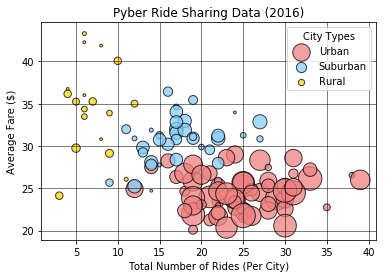

In [281]:
scatter = plt.scatter(Urban_fare["total number of rides"], Urban_fare["fare"], s=Urban_fare["driver_count"] * 8, c="lightcoral", edgecolor="black", alpha=0.75, label="Urban")
scatter = plt.scatter(Suburban_fare["total number of rides"], Suburban_fare["fare"], s=Suburban_fare["driver_count"] * 8, c="lightskyblue", edgecolor="black", alpha=0.75, label="Suburban")
scatter = plt.scatter(Rural_fare["total number of rides"], Rural_fare["fare"], s=Rural_fare["driver_count"] *8, c="gold", edgecolor="black", alpha=0.75, label="Rural")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc=1, title="City Types")
plt.grid(color="black", linestyle="-", linewidth=0.5,)
plt.xlim()
plt.ylim()


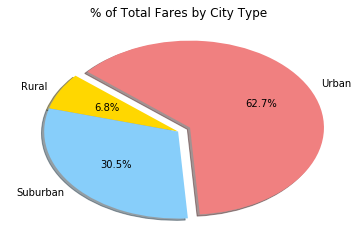

In [282]:
total_fare = combine_data.groupby(["type"], as_index=False).agg({"fare": "sum"})
explode = (0, 0 ,0.1)
colors=["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fare["fare"], labels=total_fare["type"], autopct="%1.1f%%", shadow=True, startangle=140, colors=colors, explode=explode)
plt.title("% of Total Fares by City Type")
plt.savefig("%_of_total_Fares.png")

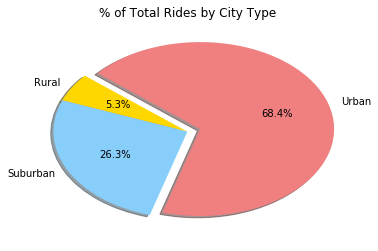

In [283]:
total_rides = combine_data.groupby(["type"], as_index=False).agg({"city": "count"})
explode = (0, 0 ,0.1)
colors=["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides["city"], labels=total_rides["type"], autopct="%1.1f%%", shadow=True, startangle=140, colors=colors, explode=explode)
plt.title("% of Total Rides by City Type")
plt.savefig("%_of_total_Rides.png")

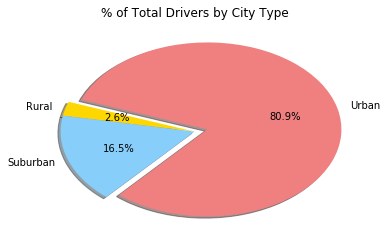

In [284]:
total_drivers = combine_data.groupby(["type"], as_index=False).agg({"driver_count": "sum"})
Rural_Drivers = Rural_fare["driver_count"].sum()
Suburban_Drivers = Suburban_fare["driver_count"].sum()
Urban_Drivers = Urban_fare["driver_count"].sum()
explode = (0, 0 ,0.1)
colors=["gold", "lightskyblue", "lightcoral"]
plt.pie([Rural_Drivers, Suburban_Drivers, Urban_Drivers] , labels=total_drivers["type"], autopct="%1.1f%%", shadow=True, startangle=160, colors=colors, explode=explode)
plt.title("% of Total Drivers by City Type")
plt.savefig("%_of_total_Drivers.png")